# Modern image classification CNN architectures

----

#### 2012: data, GPU, CUDA

Convolutional networks have been around since the 80's and their first breakthrough in computer vision came in 2012. 
The main reson behind this success was a large dataset, powerful hardware (GPU) and the software to actually train a large network on lots of data on a GPU. And one trick: ReLU. Interestingly not much has changed in the network architectures until 2012, the Alexnet is based in the same principles as LeNet.

#### 2012-2017: architectures, tricks, (stronger GPUs)

Since 2012, errors continued to decrease from 15% to 2.2% today.  These results are mostly the result of improvements of the models: architectures and other tricks. 
The new results are achieved using the same dataset.
A small part of the improvement can be attributed to stronger hardware.

----



In this notebook we will try to cover the most important concepts and improvements in convolution neural network design. Obviously this task is huge, and we will just cover some selected concepts without going into much details. In order to understand the concept more deeply we will refer to the original papers introducing the concepts.

----

In [1]:
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.layers import Dense, Dropout, Activation, Flatten
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


## LeNet

The original model from [LeCun 1998](http://www.dengfanxin.cn/wp-content/uploads/2016/03/1998Lecun.pdf), used to classify hand-written digits.


![lenet5](http://deeplearning.net/tutorial/_images/mylenet.png)

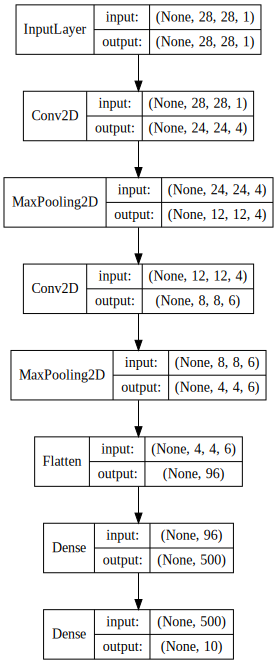

In [2]:
lenet = Sequential()

# block 1
lenet.add(Conv2D(4, kernel_size=(5, 5), activation='tanh',
                 input_shape=(28,28,1)))
lenet.add(MaxPooling2D(pool_size=(2, 2)))

# block 2
lenet.add(Conv2D(6, (5, 5), activation='tanh'))
lenet.add(MaxPooling2D(pool_size=(2, 2)))

# dense classifier
lenet.add(Flatten())
lenet.add(Dense(500, activation='tanh'))
lenet.add(Dense(10, activation='softmax'))

SVG(model_to_dot(lenet,show_shapes=True, show_layer_names=False
                ).create(prog='dot', format='svg'))

In [3]:
lenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 6)           606       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 6)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               48500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total para

----


## Let's skip 2012 and pick up progress in 2014 



### Vgg16

- 2nd place in ILSVRC 2014
- the best single model of the competition ( more tricks in the winner )
- [arxiv paper](https://arxiv.org/abs/1409.1556)

A few architectrural changes compared to LeNet.

* ReLU non-linearity instead of tanh or sigmoid
* move to 3x3 conv ( and 2 convolutions per blocks instead of 1 ) ('deeper')
* larger images -> repeat blocks multiple times to achieve large FOV for last conv untis  ('deeper')
* richer/more data: more filters ('wider' model)
* And a regularization layer: Dropout ([link to orignal paper](www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
    * during training randomly knock out a fraction of neurons (0 output)
    * during testing switch all on ( multiply outputs with the dropout probabilty )
    * the results is something like an 'ensemble' of slightly different networks
    * it's popularity has declined but still used in the best "inception" networks 


( Note the keras functional API, functions operate over tensors! )

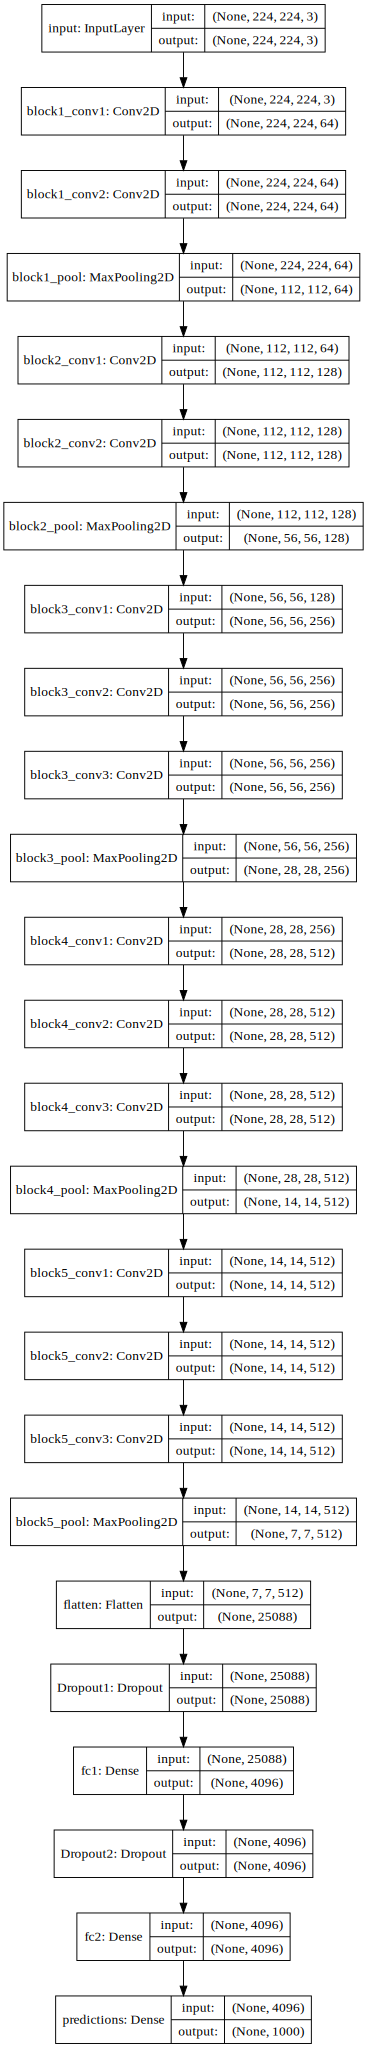

In [4]:
img_input = Input(shape=(224,224,3),name='input')

# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

# Classification block
x = Flatten(name='flatten')(x)
x = Dropout(0.5,name='Dropout1')(x)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dropout(0.5,name='Dropout2')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(1000, activation='softmax', name='predictions')(x)

vgg16 = Model(inputs=img_input, outputs=x)
SVG(model_to_dot(vgg16,show_shapes=True, show_layer_names=True
                ).create(prog='dot', format='svg'))

##### Parameters:

(Note that out of 138M params 103M is in the first dense layer! )

In [5]:
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

----

## Dropout


From the original article:

*"The key idea is to randomly drop units (along with their connections) from the neural network during training. This prevents units from co-adapting too much."*

*"During training, dropout samples from an exponential number of different “thinned” networks. At test time, it is easy to approximate the effect of averaging the predictions of all these thinned networks by simply using a single unthinned network that has smaller weights."*

*"This significantly reduces overfitting and gives major improvements over other regularization methods. "*


##### Practical potins:
* overfitting becomes a lot lot harder
* usually applied to the final dense layers (if there is any)
* slows down training


In many convolutional nets it is not used anymore, altough one of the most succesful arctiectures, [inception_v4](https://arxiv.org/abs/1602.07261) still uses it.


---

Figure 1 from the original paper:

![Dropout](https://cdn-images-1.medium.com/max/2000/1*iWQzxhVlvadk6VAJjsgXgg.png)

---

## GoogLeNet


Googlenet: Winner of the 2014 ILSVRC, the architecture has been developed ever since, and it is one the state of the art computer vision architectures.

[Original article](https://arxiv.org/abs/1409.4842)

Vgg16 was simple, inception is full of tricks.


### Inception module


* Vgg16: simple bulding block of 2 3x3 convolution followed by a maxpooling layer.
* Googlenet: Inception, multi path buliding block.

* Multi size convolutions 1x1, 3x3, 5x5, some explanation from the article: 
    * *"one can also expect that there will be a smaller number of more spatially spread out clusters that can be covered by convolutions over larger patches, and there will be a decreasing number of patches over larger and larger regions"*

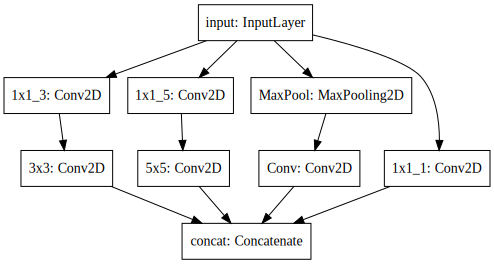

In [6]:
input_img = Input(shape=(14, 14,512),name='input')

tower_0 = Conv2D(128, (1, 1), padding='same', activation='relu', name='1x1_1')(input_img)

tower_1 = Conv2D(128, (1, 1), padding='same', activation='relu', name='1x1_3')(input_img)
tower_1 = Conv2D(256, (3, 3), padding='same', activation='relu', name='3x3')(tower_1)

tower_2 = Conv2D(24, (1, 1), padding='same', activation='relu', name='1x1_5')(input_img)
tower_2 = Conv2D(64, (5, 5), padding='same', activation='relu', name='5x5')(tower_2)

tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same', name='MaxPool')(input_img)
tower_3 = Conv2D(64, (1, 1), padding='same', activation='relu', name='Conv')(tower_3)

output = keras.layers.concatenate([tower_0, tower_1, tower_2, tower_3],
                                  name ='concat', axis=3)

inception = Model(inputs=input_img, outputs=output)
SVG(model_to_dot(inception,show_shapes=False, show_layer_names=True
                ).create(prog='dot', format='svg'))

In [7]:
inception.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 14, 14, 512)  0                                            
__________________________________________________________________________________________________
1x1_3 (Conv2D)                  (None, 14, 14, 128)  65664       input[0][0]                      
__________________________________________________________________________________________________
1x1_5 (Conv2D)                  (None, 14, 14, 24)   12312       input[0][0]                      
__________________________________________________________________________________________________
MaxPool (MaxPooling2D)          (None, 14, 14, 512)  0           input[0][0]                      
__________________________________________________________________________________________________
1x1_1 (Con

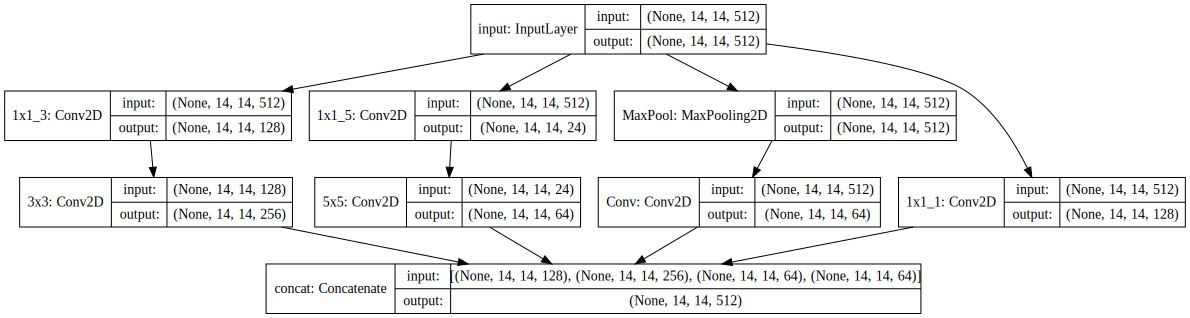

In [8]:
SVG(model_to_dot(inception,show_shapes=True, show_layer_names=True
                ).create(prog='dot', format='svg'))

---


## Bottlenecks

Apart from multiple paths with different convolutional kernel sizes, inception modules feature a 1x1 convolutional **compression** step before 3x3 or 5x5 convolutions.

The main idea is that $k \times k$ convolutional layers use $(k^2+1) \times nfilt_{prev} \times nfilt_{next}$ parameters, which starts to be very heavy at the later stages of the network where the spatial dimensions are reduced, but the number of filters reaches 500 or 1000. 


It's possible to keep the computational burden and the number of parameters low, and keep the models representational power similar. Before the convolution with filter size 3 or 5, we can compress the representation with 1x1 'convolution' into a temporary stage. 

In the case of the 5x5 convolutions, the inception module above agressively compresses the 512 filters into 24 filters and then computes the 5x5 convolution. The number of filter parameters thus becomes: $ 2 \times 512 \times 24  + (5 \times 5 + 1 ) \times 24 \times 64  = 64,512 $ instead of a naive 5x5 convoltuion with 512 input and 64 output filter which has $(5 \times 5 + 1 )  \times 512 \times 64  = 851,968 $ parameters.

The 3x3 branch uses a similar but less aggressive stategy to reduce parameter size to 458,752 from 1,310,720.


---

A 3x3 convolution from 512 filters to 512 filters without bottleneck costs 2.36M params.

In [9]:
input_img = Input(shape=(None, None,512),name='input')

# first block with no bottleneck to demonstrate
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='3x3_convolution')(input_img)

no_bottleneck = Model(inputs=input_img, outputs=x)
no_bottleneck.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None, None, 512)   0         
_________________________________________________________________
3x3_convolution (Conv2D)     (None, None, None, 512)   2359808   
Total params: 2,359,808
Trainable params: 2,359,808
Non-trainable params: 0
_________________________________________________________________


A 3x3 convolution with bottleneck mapping from 512 filters to 512 filters costs only 0.59M params.

In [10]:
input_img = Input(shape=(None, None,512),name='input')

# second  block with bottleneck to demonstrate
x = Conv2D(128, (1, 1), padding='same', activation='relu', name='1x1_conv_compression')(input_img)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='3x3_conv')(x)

bottleneck = Model(inputs=input_img, outputs=x)
bottleneck.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None, None, 512)   0         
_________________________________________________________________
1x1_conv_compression (Conv2D (None, None, None, 128)   65664     
_________________________________________________________________
3x3_conv (Conv2D)            (None, None, None, 512)   590336    
Total params: 656,000
Trainable params: 656,000
Non-trainable params: 0
_________________________________________________________________


Obviously a compression step like this might hurt the representational power of the model, but the gains turn out to be larger than the loss. 

In the end a layer with more filters and a bottleneck has larger representational power than a layer with the same number of parameters but no bottleneck.

----

Example for no bottleneck with similar number parameters:

A layer without bottleneck but 0.59M params can have 256 filters.

In [11]:
input_img = Input(shape=(None, None,256),name='input')

# first block with no bottleneck to demonstrate
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='3x3_convolution')(input_img)

no_bottleneck = Model(inputs=input_img, outputs=x)
no_bottleneck.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None, None, 256)   0         
_________________________________________________________________
3x3_convolution (Conv2D)     (None, None, None, 256)   590080    
Total params: 590,080
Trainable params: 590,080
Non-trainable params: 0
_________________________________________________________________


##### With decompression

Also reducing the output of the 3x3 convolution, and decompressing it with 1x1 further reduces computation/parameters.

In [12]:
input_img = Input(shape=(None, None,512),name='input')

# second  block with bottleneck to demonstrate
x = Conv2D(128, (1, 1), padding='same', activation='relu', name='1x1_conv_compression')(input_img)
x = Conv2D(128, (3, 3), padding='same', activation='relu', name='3x3_conv')(x)
x = Conv2D(512, (1, 1), padding='same', activation='relu', name='1x1_decomp')(x)


bottleneck = Model(inputs=input_img, outputs=x)
bottleneck.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None, None, 512)   0         
_________________________________________________________________
1x1_conv_compression (Conv2D (None, None, None, 128)   65664     
_________________________________________________________________
3x3_conv (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
1x1_decomp (Conv2D)          (None, None, None, 512)   66048     
Total params: 279,296
Trainable params: 279,296
Non-trainable params: 0
_________________________________________________________________


#### Messages:

* Bottlenecks help improve the representational power of models while keeping the computational/paramater budget constant
* [Adding bottlenecks to the vgg16/19](https://pjreddie.com/darknet/imagenet/) model enables it to reduce single run top5 error from 10% to 6.5%. (also remove dense layers, dropout and add batchnorm). The model is called Darknet19.



----

### Auxiliary classifiers

Another trick in googlenet, was to add extra output nodes in the middle of the network to allow lower layers to have contact with the output, to help "gradient flow".

These outputs were not used during the final predictions they are only used to give feedback to parameters at lower stages.

---

An example of auxiliary classifiers:

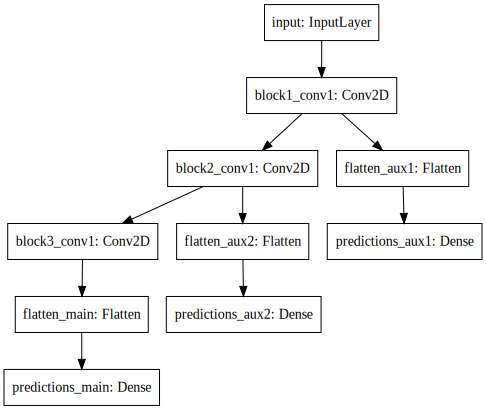

In [13]:
img_input = Input(shape=(32,32,3),name='input')

# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)

# Aux Classification block
xa1 = Flatten(name='flatten_aux1')(x)
xa1 = Dense(1000, activation='softmax', name='predictions_aux1')(xa1)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)


# Aux Classification block
xa2 = Flatten(name='flatten_aux2')(x)
xa2 = Dense(1000, activation='softmax', name='predictions_aux2')(xa2)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)

# Classification block
x = Flatten(name='flatten_main')(x)
x = Dense(1000, activation='softmax', name='predictions_main')(x)


model_w_aux = Model(inputs=img_input, outputs=[x,xa1,xa2])
SVG(model_to_dot(model_w_aux,show_shapes=False, show_layer_names=True
                ).create(prog='dot', format='svg'))

Auxuliary classifiers are still used in (e.g.: inception_v3) but their role was mostly replaced by "skip connections" and "residual" networks.

## Resnets

Surprisingly stacking more layers to the vgg16 model, does not help. It turned out that simple and too deep networks just can not be trained. A 56 layer deep basic convolutional model has higher error rate both on the test data and the traning data. Even though they have more parameters, are not even able to overfit the data.


Figure 1 from He et al 2015:
![src](https://wiki.tum.de/download/attachments/22578294/Figure%201.bmp?version=1&modificationDate=1485208088253&api=v2)

This results seems to indicated that there is some problem with the optamization scheme used to train the model. Googlenet try to overcome the problem with auxiliary classifiers, others introduced "Residual networks" or skip connections in order to train deeper models.

This concept enabled the MSRA team to win the ILSVRC in 2015.


---

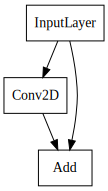

In [14]:
x = Input(shape=(None,None,64))
# 3x3 conv with 3 output channels (same as input channels)
y = Conv2D(64, (3, 3), padding='same')(x)
# this returns x + y.
z = keras.layers.add([x, y])

model = Model(inputs=x, outputs=z)
SVG(model_to_dot(model,show_shapes=False, show_layer_names=False).create(prog='dot', format='svg',))

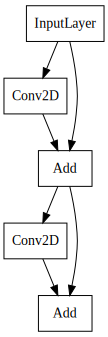

In [15]:
x = Input(shape=(None,None,64))
# 3x3 conv with 3 output channels (same as input channels)
y = Conv2D(64, (3, 3), padding='same')(x)
# this returns x + y.
z = keras.layers.add([x, y])

# 3x3 conv with 3 output channels (same as input channels)
a = Conv2D(64, (3, 3), padding='same')(z)
# this returns x + y.
out = keras.layers.add([z, a])

model = Model(inputs=x, outputs=out)
SVG(model_to_dot(model,show_shapes=False, show_layer_names=False).create(prog='dot', format='svg',))

#### Interpretation 1:

Their original interpretation: 

Learnig the small difference instead of learning identity + a small difference.

*"We hypothesize that it is easier to optimize the residual mapping than to optimize the original, unreferenced mapping. To the extreme, if an identity mapping were optimal, it would be easier to push the residual to zero than to fit an identity mapping by a stack of nonlinear layers."*

#### Interpretation 2:

Skip connections: direct gradient feedback from the output to each layer.


2 layers no skip connection: $ NN(x) = G[F(x)] $

$$ \frac{dG}{dW}  =  G'[F(x)] \times \frac{dF}{dW} $$


---

The formula shows that the gradient of the first layer will get mutiplied by the derivative of each subsequent function in the networks. If the derivatives of the subsequent layers contain some noise (they are calculated with respect to the minibatch only) and there are many layers the real signal in the gradient might vanish, and it can become too 'noisy'.

---

2 layers with skip connection: $ NN(x) = G[F(x)] + F(x) $

$$ \frac{dG}{dW}  =   G'[F(x)] \times \frac{dF}{dW} +  \frac{dF}{dW}  $$

---

the fi

As you see skip connections introduce a direct path for the F function with w parameters to act on the output, and therefore a direct path appears in the gradient.

### See with 3 layers 

3 layers no skip: $ NN(x) = H\{G[F(x)]\} $

$$ \frac{dH}{dW}  = H'\{G[F(x)]\} \times G'[F(x)] \times \frac{dF}{dW} $$


3 layers with  skip:  $ NN(x) = H\{G[F(x)]+G[F(x)]\} + G[F(x)] + F(x) $



$$ \frac{dH}{dW}  = H'\{G[F(x)] + F(x)\} \times G'[F(x)] \times \frac{dF}{dW} \\
+ H'\{G[F(x)] + F(x)\} \times \frac{dF}{dW} \\ +  G'[F(x)] \times \frac{dF}{dW} \\ + \frac{dF}{dW} $$


---

With skip connections each individual path from the input to the output corresponds to a part of the sum in the gradient. With 4 paths we get the sum of 4 parts. 

---

#### The original Resnet block

* bottleneck
* \+ batchnorm


There are many-many variants now: with or without Bottleneck, place of relu and activation ...

In [16]:
from keras.layers import BatchNormalization,Activation

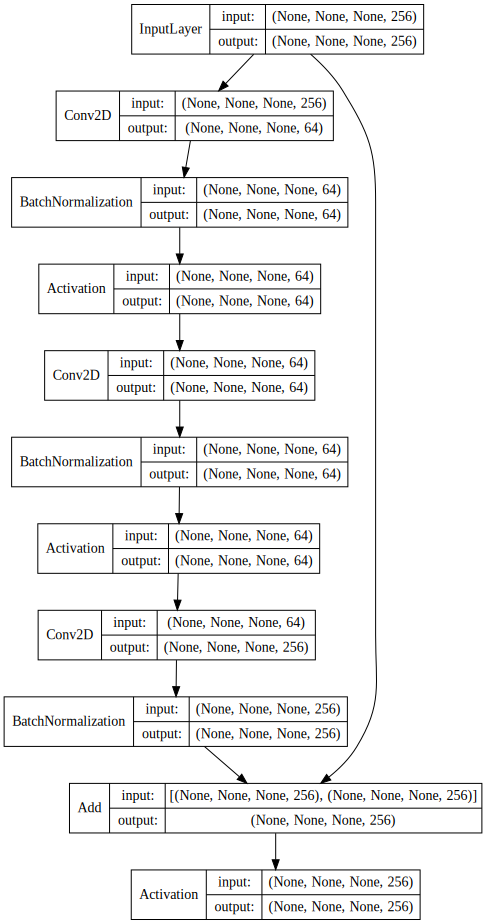

In [17]:
x = Input(shape=(None,None,256))
# 3x3 conv with 3 output channels (same as input channels)
y = Conv2D(64, (1, 1), padding='same')(x)
y = BatchNormalization()(y)
y = Activation('relu')(y)
# 3x3 conv with 3 output channels (same as input channels)
y = Conv2D(64, (3, 3), padding='same')(y)
y = BatchNormalization()(y)
y = Activation('relu')(y)
# 3x3 conv with 3 output channels (same as input channels)
y = Conv2D(256, (3, 3), padding='same')(y)
y = BatchNormalization()(y)
# this returns x + y.
out = keras.layers.add([x, y])
out = Activation('relu')(out)

model = Model(inputs=x, outputs=out)
SVG(model_to_dot(model,show_shapes=True, show_layer_names=False
                ).create(prog='dot', format='svg',))

## Batch normalization

Original article: https://arxiv.org/abs/1502.03167

* "The training is complicated by the fact that the inputs to each layer are affected by the parameters of all preceding layers so that small changes to the network parameters amplify as the network becomes deeper."

* "The change in the distributions of layers’ inputs presents a problem because the layers need to continuously adapt to the new distribution. When the input distribution to a learning system changes, it is said to experience covariate shift"


The normalization is a mean substraction and division by the std. ( And a learned scaling after the normalization). 

The values are calculated among each example of the same unit in the minibatch. For dense layers it practically means that minibatches should not be smaller than 16. For convolution layers, the aggregation is also performed along the spatial axis.

During inference, the mean and std for the whole dataset is used, this is calculated during training with a running average.



#### Practially:
- Radically speeds up traninig
- Eliminates the need for Droputs
- Leads to better generalization


#### More:
- Batch renormalization: https://arxiv.org/abs/1702.03275
- Self normalizing units, SeLU: https://arxiv.org/abs/1706.02515

---

# And a few more:

----

## Inceptions (-Resnet)

The continued development on inception (GoogleNet) models lead to one of the state of the art models for images classification. These are highly tuned, and very effective models developped by a research group in Google.


Articles:
* [Inception3](https://arxiv.org/abs/1512.00567)
* [Inception4, Inception-Resnet](https://arxiv.org/abs/1602.07261)

---

## ResNext


- Group convolutions to further reduce parameters/computation eith similar repsentation power


![resnext](http://www.deeplearningpatterns.com/lib/exe/fetch.php?media=wiki:resxnet.png)

---

## DenseNet

A lot more skip connections.

![densenet](https://data-sci.info/wp-content/uploads/2017/07/densenet-3.png)

![densenet](https://d2mxuefqeaa7sj.cloudfront.net/s_8C67F3B1EB0F5ABE74BEB3BC706769E48F9A2C9CE88212D04817755A2125A582_1495365425569_image.png)


----

## SEnet

- 2017 (last) ILSVRC winners

![src](https://cdn-images-1.medium.com/max/2000/1*bmObF5Tibc58iE9iOu327w.png)


---


# Summary:

Lots of architectural improvements reducing single model errors 4-5 fold since 2012, for major benchmarks. It is also contiuously happening, you need to follow the news.

- Batch normalization, always!
- No need for the final dense layers, Dropouts not really important either.
- Bottlenecks for better representation with fewer parameters.
- Residual connections in order to train really deep models.
- Inceptions are highly tuned models for general image classification.


State of the art models generally need a lot of resources, but interestingly huge models (70-80M params) can be trained on relatively small datasets, like CIFAR10 too.

Original implementations are usually published, or tested reimplementation appear after short time in one of the usual frameworks (Caffe, Torch, Tensorflow, Keras etc). But usually you can implement it yourself too!